[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sandy-lee29/data-viz-with-python/blob/main/Color_and_chartstyle.ipynb)

# 📊 Comprehensive Guide to Data Visualization with Pandas & Seaborn & Matplotlib

##🔹 What You'll Learn <br>
✅ Distinguishing groups (categorical scales) <br>
✅ Representing values (sequential and diverging scales) <br>
✅ Highlighting specific elements (custome colors and gray) <br>
✅ Themes (set_palette & set_theme)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc = {"figure.figsize": [8, 8], "figure.dpi": 72})

In [2]:
import pandas as pd

gapminder = pd.read_csv("gapminder.tsv", sep="\t")
print(gapminder.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [16]:
gm_2007 = gapminder[gapminder.year == 2007]

### ✅ Distinguishing Groups : Categorical Scales
When we have different categories to distinguish, there is a tricky balance to strike: we need a set of colors that are clearly distinct from each other (including for colorblind viewers), but also work well enough together that none of the categories stands out from the others.

There are many predefined palettes we can use, so most of the time we don't have to figure this out by ourselves.

Let's look at examples using different chart types.

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

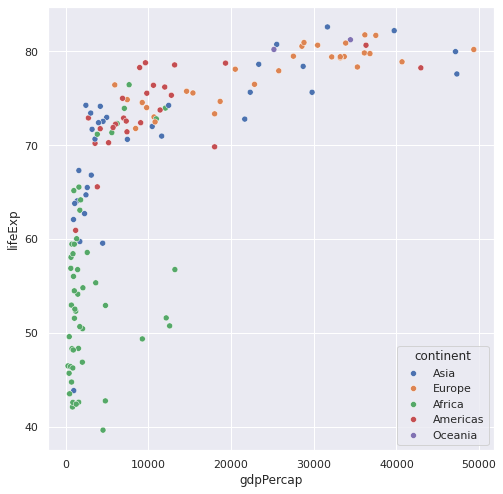

In [5]:
# scatterplot
sns.scatterplot(gm_2007, x="gdpPercap", y="lifeExp", hue = "continent")

<Axes: xlabel='year', ylabel='pop'>

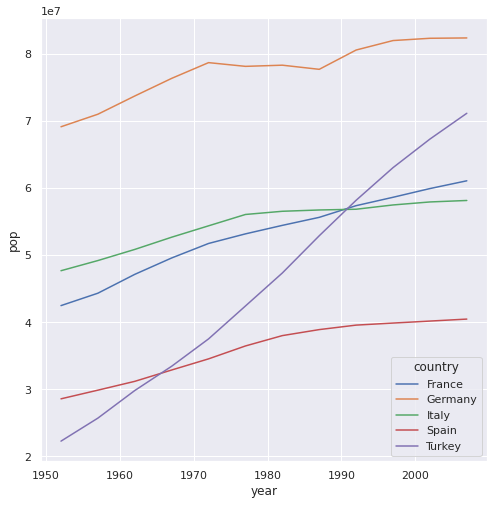

In [6]:
# line chart
large_european_countries = ["France", "Germany", "Italy", "Spain", "Turkey"]
europe_subset = gapminder[gapminder.country.isin(large_european_countries)]
sns.lineplot(europe_subset, x="year", y="pop", hue="country")

<Axes: xlabel='pop', ylabel='country'>

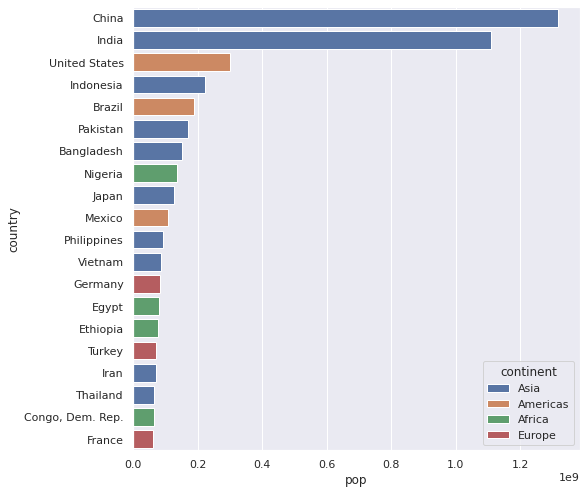

In [7]:
# bar chart
# Get the 20 most populated countries
top_20 = gm_2007.nlargest(20, "pop")

sns.barplot(top_20, x="pop", y="country", hue="continent")

<Axes: xlabel='pop', ylabel='country'>

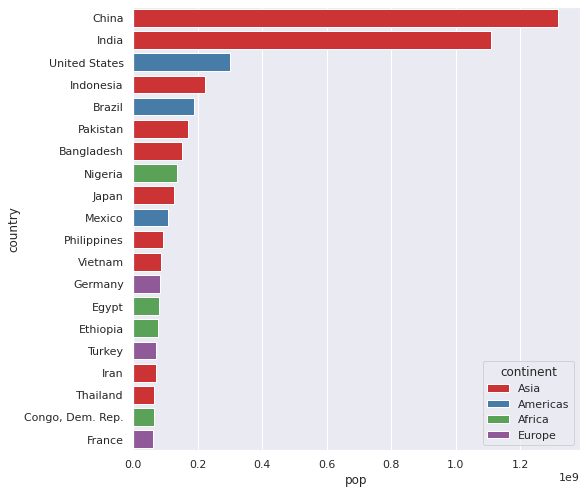

In [13]:
sns.barplot(data=top_20, x="pop", y="country", hue="continent", palette="Set1")


### ✅ Representing values (sequential and diverging scales)
Most commonly seen in a heatmap or choropleth map, where there would be no value represented unless we used a color scale. We will use heatmaps for illustration in this section.

To work well for representing values, the chosen scale should be:

- Perceptually uniform
- Appropriate for the data (diverging if there is a midpoint that makes sense, and sequential if not)

### Sequential Scales

<Axes: xlabel='year', ylabel='country'>

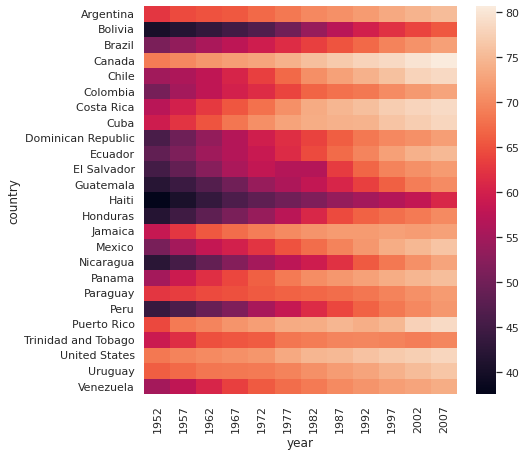

In [8]:
lifeExp_by_country_americas = gapminder[gapminder.continent == "Americas"].pivot(columns = "year", index = "country", values = "lifeExp")

plt.figure(figsize=(7, 7))
sns.heatmap(lifeExp_by_country_americas)

<Axes: xlabel='year', ylabel='country'>

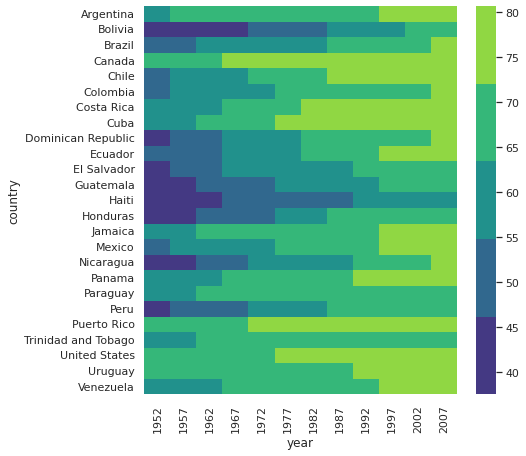

In [15]:
plt.figure(figsize=(7, 7))
sns.heatmap(lifeExp_by_country_americas, cmap = sns.color_palette(palette="viridis", n_colors=5))

### Diverging scales
Where the value being represented by color has a meaningful midpoint (specified using the center parameter).

<Axes: ylabel='country'>

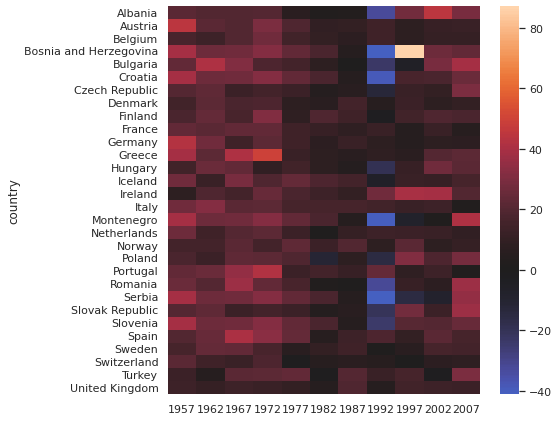

In [10]:
# Pivot and calculate growth rates
gdp_by_country_europe = gapminder[gapminder.continent == "Europe"].pivot(index="country", columns="year", values="gdpPercap")

# Calculate percent growth between successive years
gdp_growth = pd.DataFrame(index=gdp_by_country_europe.index)
years = sorted(gdp_by_country_europe.columns)
for i in range(1, len(years)):
    prev_year = years[i-1]
    curr_year = years[i]
    gdp_growth[curr_year] = ((gdp_by_country_europe[curr_year] - gdp_by_country_europe[prev_year]) / gdp_by_country_europe[prev_year] * 100)

plt.figure(figsize=(7, 7))
sns.heatmap(gdp_growth, center = 0) # Can also specify vmin, vmax to clip

<Axes: ylabel='country'>

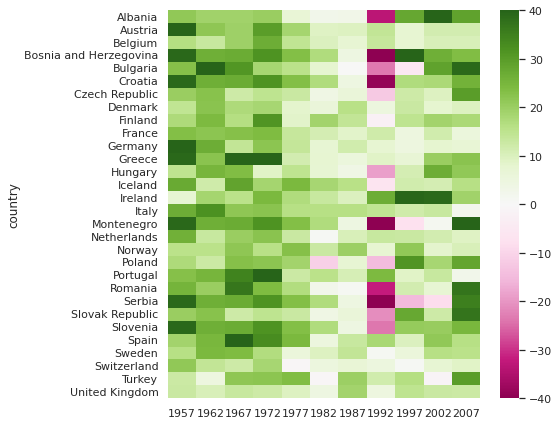

In [12]:
plt.figure(figsize=(7, 7))
sns.heatmap(gdp_growth, center = 0, cmap = "PiYG", vmin = -40, vmax = 40) # Can also specify vmin, vmax to clip

### ✅ Highlighting specific elements
We've already seen this as a common feature of an explanatory chart: using color to highlight specific data points while de-emphasizing others, often by making them gray.

This may mean that the legend loses its meaning and we have to remove it, perhaps using annotations to label the lines directly.

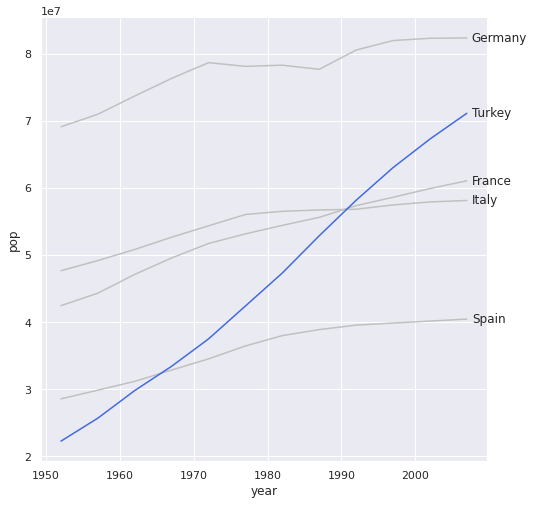

In [14]:
custom_colors = ["royalblue" if x == "Turkey" else "silver" for x in large_european_countries]
sns.lineplot(europe_subset, x="year", y="pop", hue="country", palette=custom_colors, legend = False)

# Add country labels at ends of lines
labels = europe_subset[europe_subset.year == europe_subset.year.max()]
for index, row in labels.iterrows():
    plt.annotate(
        row["country"], xy=(row["year"], row["pop"]), xycoords = "data",
        xytext=(5, 0), textcoords = "offset pixels", verticalalignment = "center"
    )

# Remove lines at top and right of chart
sns.despine()

<Axes: xlabel='pop', ylabel='country'>

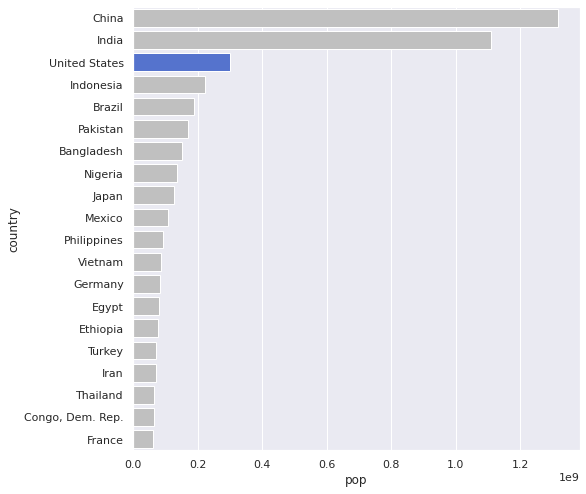

In [18]:
top_20_colors = ["royalblue" if x == "United States" else "silver" for x in top_20.country]
sns.barplot(top_20, x="pop", y="country", hue="country", palette = top_20_colors)

### ✅ Themes

Seaborn has a set_palette function, which you can use to set the default palette for all subsequent charts, meaning that you don't have to specify it each time.

It also has a set_theme function, which allows you to set both a style (possible values are "darkgrid", "whitegrid", "dark", "white", "ticks") and a context (which can be “notebook”, “paper”, “talk”, or “poster”) which adapts the output according to where the chart will be shown. For example, the font size usually needs to be bigger in a chart that is destined for a slide deck, compared to a notebook. Other Matplotlib parameters can go in a dict with the rc parameters.

<Axes: xlabel='year', ylabel='pop'>

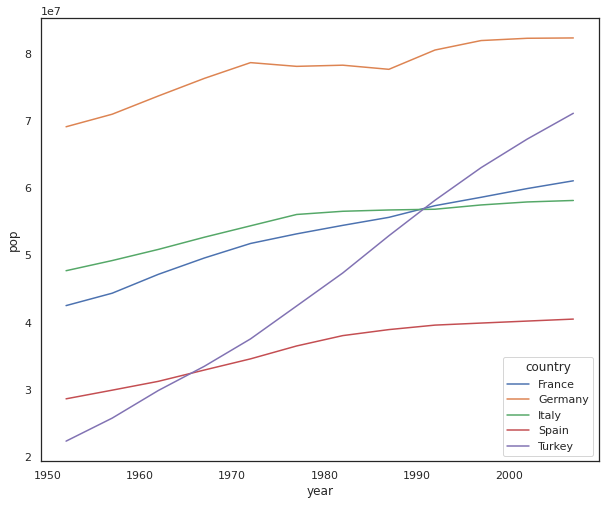

In [22]:
# Commenting this out because once run, it will affect the rest of the notebook
sns.set_theme(style = "white", context = "notebook", rc = {"figure.figsize": [10, 8], "figure.dpi": 72})
sns.lineplot(europe_subset, x="year", y="pop", hue="country")